# Clase 5 - Tensorflow

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
mnist = tf.keras.datasets.mnist.load_data()

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

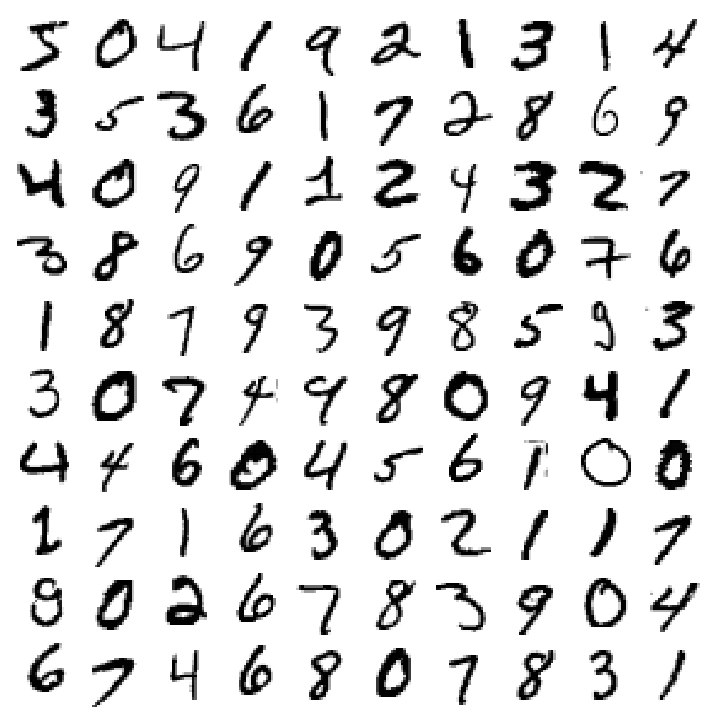

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.figure(figsize=(7, 7))
for i in range(100):
  plt.subplot(10, 10, i + 1)
  plt.imshow(X_train[i], cmap=mpl.cm.binary, interpolation="nearest")
  plt.axis("off")

plt.tight_layout(pad=0.1)
plt.show()

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train[0].max(), X_train[0].min()

(np.float64(1.0), np.float64(0.0))

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=[
        "accuracy"
    ]
)

In [ ]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8559 - loss: 0.4926
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9551 - loss: 0.1546
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9664 - loss: 0.1096
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9744 - loss: 0.0861
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9764 - loss: 0.0747


In [ ]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9775 - loss: 0.0764


[0.07635528594255447, 0.9775000214576721]

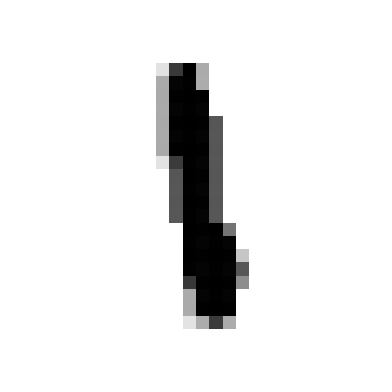

Probabilidades por clase: [1.2510160e-12 9.9997842e-01 5.5075623e-07 3.3631193e-06 1.1773599e-05
 1.8318308e-07 6.8624209e-09 1.5543135e-07 5.5079640e-06 2.4146740e-08]
Predicción: 1


In [ ]:
# Tomar una imagen de entrenamiento y normalizarla
sample_img = X_train[200]

# Mostrar la imagen en escala de grises (blanco-negro invertido)
plt.matshow(sample_img, cmap="gray_r")
plt.axis("off")          # Oculta ejes
plt.show()

# Redimensionar para que el modelo espere (batch_size, 28, 28)
sample_input = sample_img.reshape(1, 28, 28)

# Obtener predicciones
probs = model.predict(sample_input, verbose=0)[0]  # vector de 10 probabilidades
pred_class = np.argmax(probs)                      # índice de la mayor probabilidad

print("Probabilidades por clase:", probs)
print(f"Predicción: {pred_class}")


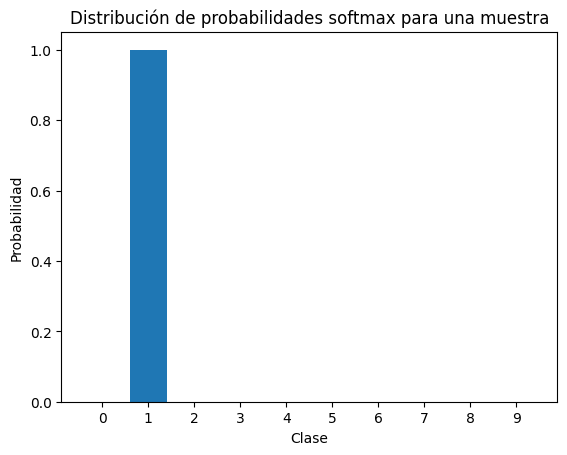

In [ ]:
plt.bar(range(10), probs)
plt.xlabel("Clase")
plt.ylabel("Probabilidad")
plt.title("Distribución de probabilidades softmax para una muestra")
plt.xticks(range(10))
plt.show()

In [ ]:
model.save("number_predictor.keras")